## SVM Plant Growth

Este es un problema de clasificación binaria en el que se busca predecir si una planta crecerá o no.

In [27]:
# Instalación de librerías
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [28]:
# Importación de librerías
import pandas as pd
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns

In [29]:
# Carga de datos
plantas = pd.read_csv('./assets/plant_growth_data.csv', delimiter=',')
plantas.head()

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0


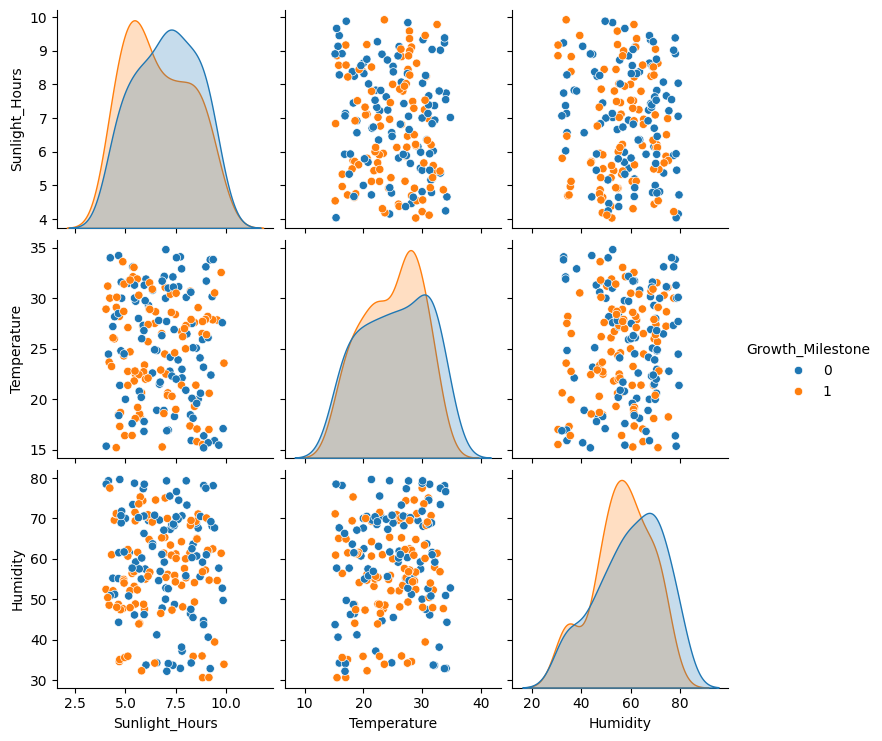

In [30]:
# Graficación de datos
sns.pairplot(plantas, hue='Growth_Milestone')

In [31]:
# Preparación de variables
X = plantas[['Sunlight_Hours', 'Temperature', 'Humidity']]
y = plantas['Growth_Milestone']

In [32]:
# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [33]:
# Creación de instancia del modelo SVM
classifier = SVC(kernel='poly', random_state=0) # Por defecto el grado del polinomio es 3

In [34]:
# Entrenamiento del modelo
classifier.fit(X_train, y_train)

SVC(kernel='poly', random_state=0)

In [35]:
# Predicción de los datos de prueba
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0])

In [36]:
# Metricas de evaluación
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
print(f'Precision: {metrics.precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {metrics.recall_score(y_test, y_pred, average="weighted")}')
print(f'F1 Score: {metrics.f1_score(y_test, y_pred, average="weighted")}')
print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}')
print(f'Classification Report:\n{metrics.classification_report(y_test, y_pred)}')

Accuracy: 0.42857142857142855
Precision: 0.4205513784461153
Recall: 0.42857142857142855
F1 Score: 0.42176870748299317
Confusion Matrix:
[[ 7 16]
 [12 14]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.30      0.33        23
           1       0.47      0.54      0.50        26

    accuracy                           0.43        49
   macro avg       0.42      0.42      0.42        49
weighted avg       0.42      0.43      0.42        49

